## Jiang, et al - Gene Analysis of Hematopoietic Stem Cell RNASeq Data
### Normal (Aged and Young)  vs. Myeloproliferative Neoplasms (MPN) 
* Aged bone marrow (ABM): 'X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0'
* Young bone marrow (YBM): 'X26_1', 'X26_2', 'X26_7', 'X27_8'
* Polycythemia Vera (PV): 'X598.PB.Stem_S12', 'X562.PB.Stem_S0','X689.BM.Stem_S0'
* Essential Thrombocythemia (ET):'X431.PB.Stem','X638.BM.Stem'
* Myelofibrosis (MF): 'X724.PB.Stem_S4', 'X668.PB.Stem_S4','X736.BM.Stem_S0', 'X600.PB.Stem', 'X580.BM.Stem_S0', 'X664.BM.Stem', 'X428.PB.Stem', 'X566.PB.Stem', 'X600.BM.Stem', 'X407.PB.Stem', 'X569.PB.Stem', 'X581.PB.Stem', 'X599.PB.Stem', 'X621.PB.Stem', 'X422.PB.Stem', 'X767.BM.Stem', 'X744.PB.Stem', 'X567.PB.Stem', 'X560.PB.Stem', 'X576.PB.Stem', 'X573.BM.Stem', 'X670A.PB.Stem', 'X670B.PB.Stem', 'X666.PB.Stem'
* Chronic Myeloid Leukemia (CML): 'X608.BM.Stem', 'X616.BM.Stem', 'X571.BM.Stem', 'X727.PB.Stem', 'X703.PB.Stem'
* Acute Myeloid Leukemia (sAML): '735.PB.Stem', '735.BM.Stem', '591.PB.Stem', '672A.PB.Stem', '672B.PB.Stem'


RNAseq Differential Expression Analysis, QC, functional enrichment analysis
Authors: Art Nasamran, M.S. Cnasamran@ucsd.edu and Kathleen Fisch, Ph.D. Kfisch@ucsd.edu
February 2018
The analysis notebook below that is adapted from the Bioconductor RNASeq123 workflow. It has been edited by Kathleen Fisch (CCBB). https://www.bioconductor.org/help/workflows/RNAseq123/

Primary Analysis Pipeline
QC - FASTQC Alignment -- STARv2.5.3a Quantification -- RSEM-1.3.0 Human genome -- hg19 Annotation -- Gencode v19

In [42]:
#install.packages("R.utils", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gplots", destdir="/mnt/data1/tomw/R/R-3.4.3/")

#source("http://bioconductor.org/biocLite.R")
#biocLite("BiocUpgrade")
#update.packages(instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("limma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("limma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("edgeR", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Glimma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Mus.musculus")
#biocLite("Homo.sapiens", instlib="/mnt/data1/tomw/R/R-3.4.3/",)
#install.packages("splitstackshape", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("PoiClaClu", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("statmod", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("plyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("dplyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gdata", destdir="/mnt/data1/tomw/R/R-3.4.3/")

### Preprocess RNASeq Count Data and metadata

In [1]:
library(IRdisplay)
library(limma)
library(edgeR)
library(Glimma)
#library(Mus.musculus)
library(Homo.sapiens)
library(splitstackshape)
library(PoiClaClu)
library(statmod)
library(plyr)
library(dplyr)
library(gdata)
library(org.Hs.eg.db)
EG2SYM <- toTable(org.Hs.egSYMBOL)
library(SPIA)

Warning message:
“package ‘IRdisplay’ was built under R version 3.4.4”Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, r

In [2]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /mnt/data1/tomw/anaconda2/lib/R/lib/libRblas.so
LAPACK: /mnt/data1/tomw/anaconda2/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] SPIA_2.30.0                            
 [2] KEGGgraph_1.38.0                       
 [3] gdata_2.18.0                           
 [4] dplyr_0.7.7                            
 [5] plyr_1.8.4                             
 [6] statmod_1.4.30    

In [3]:
name <- "comp2"
name2 <- "20180216"
genes_rsem_new <- read.csv("all_genes_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)
    


[1] 57820   734

,X4259_GTGAAA_S0,X87,X97,X4727sp1,X22_15,X4215_GTGAAA_S0,X26_2,X4066_GTGAAA_S0,X91,X426_ACAGTG_S0,⋯,X670A.PB.Prog_S3,X664.Stroma_S6,X767_Stroma_S0,X600.PB.Prog_S0,X689.BM.Prog_S11,X666.PB.Stem_S3,X571.Stroma_S0,X672A.PB.Prog_S3,X591.BM.Stem_S0,X767.BM.Prog_S0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.10,65.00,38.00,0.00,377.00,228,151.00,221.00,60.00,13.00,51.0,⋯,9.00,762.00,420.00,217.00,63.00,64.00,13.00,4.00,19.00,219.00
ENSG00000000005.5,0.00,1.00,0.00,50.00,0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,1216.00,684.00,1442.00,451.00,373,1501.00,571.00,1695.00,715.00,1170.0,⋯,1787.00,1130.00,2541.00,1287.00,2163.00,892.00,888.00,3708.00,2472.00,1451.00
ENSG00000000457.9,1066.71,907.39,1244.89,322.88,229,877.56,819.19,697.84,414.76,918.1,⋯,746.18,302.92,187.13,525.52,684.85,924.19,254.78,470.46,266.73,1044.81
ENSG00000000460.12,2372.29,1066.61,1404.11,128.12,44,2212.44,297.81,1339.16,391.24,1744.9,⋯,543.82,129.08,112.87,295.48,1453.15,346.81,208.22,354.54,29.27,1254.19
ENSG00000000938.8,137.00,103.00,71.00,107.00,8,9.00,92.00,173.00,335.00,38.0,⋯,152.00,3153.00,15773.00,234.00,203.00,343.00,13697.00,737.00,49.00,416.00


In [6]:
meta <- read.csv("combined_meta2.csv", stringsAsFactors=FALSE)
meta$CellType <- rep("BM", nrow(meta))
types <- unlist(lapply(meta$ID, function(x) strsplit(x, split="\\.")[[1]][2]))
meta$CellType[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- types[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))]
meta$Sample.type2 <- meta$Sample.type3 <- meta$Sample.type4 <- meta$Phenotype <- recode(meta$Sample.type, `Aged normal bone marrow`="ABM", `Young normal bone marrow`="YBM")
meta$Sample.type2[which(meta$Sample.type %in% c("ABM","YBM"))] <- "NBM"
meta                       
meta$Sample.type4 <- recode(meta$Sample.type3, sAML="sAML_UnTx", `de novo AML`="sAML_UnTx", AML="sAML_Tx")                       
meta$Sample.type2 <- gsub("^AML$", "sAML", meta$Sample.type2)
meta$Sample.type3 <- gsub("^AML$", "sAML", meta$Sample.type3)
meta$Sample.type2[which(meta$Condition == "de novo AML")] <- "dnAML"
meta$Sample.type3[which(meta$Condition == "de novo AML")] <- "dnAML"

meta2 <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20200303.csv", 
                  header=TRUE, stringsAsFactors = FALSE)

meta$Sex <- meta2[match(gsub("_S[0-9]+$","",meta$Sample), 
                        gsub("_S[0-9]+$","",meta2$Sample)), "Sex"] 

table(meta$Sample.type3, meta$Cell.type)
meta2.Prog.filt <- meta2[meta2$Sample.type3 %in% c("ABM", "YBM", "CML", "sAML", "ET", "PV", "MF", "dnAML") & 
                         meta2$Cell.type %in% c("Progenitor", "Sorted progenitors"),]
meta2.Prog.filt$Phenotype <- factor(as.character(meta2.Prog.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
                         
meta2.Prog.all.filt <- meta2[meta2$Cell.type %in% c("Sorted progenitors", "Progenitor"),]

meta2.Stem.filt <- meta[meta$Sample.type3 %in% c("ABM", "YBM", "CML", "sAML", "ET", "PV", "MF") & 
                         meta$Cell.type %in% c("Stem", "Sorted stem"),]
meta2.Stem.filt$Phenotype <- factor(as.character(meta2.Stem.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
table(meta2.Stem.filt$Phenotype)
table(meta2.Stem.filt$Sample.type3)
                       
genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]
genes2 <- plyr::ddply(AnnotationDbi::select(Homo.sapiens,
                        keys=gsub("[.].*$","", rownames(gene_counts_new)),
                        columns = c("SYMBOL", "ENSEMBL", "ENTREZID"),
                        keytype="ENSEMBL"), "ENSEMBL", function(X){X[1,]})


meta2$Phenotype <- meta2$Condition_code2
meta2$Phenotype[which(meta2$Condition_code2 %in% c("Aged_Normal","Young_Normal"))] <- "Normal"
meta2$Phenotype2 <- recode(meta2$Condition_code2, Aged_Normal="ABM", Young_Normal="YBM")
meta2$Condition_code3 <- meta2$Condition_code
meta2$Condition_code <- gsub("_risk_myelofibrosis$", "", 
                             gsub("_postPV$", "", gsub("_postET$", "", 
                                  gsub("_fromMDS$", "", gsub("^int2", "intermediate_risk", 
                                       gsub("syProgic_mastocytosis_","",
                                            meta2$Condition_code))))))
meta2$Condition_code[meta2$Condition_code %in% "myelofibrosis"] <- "low"
meta2$Phenotype <- gsub("^AML", "sAML", gsub("^denovo", "dn", meta2$Phenotype))
table(meta2$Phenotype)
table(meta2$Condition_code3)
meta2_filt <- subset(meta2, Phenotype %in% c("Normal", "MF", "PV", "ET", "CML", "AML") 
                     #& 
                     #  Cell.type %in% c("Prog", "Progenitor")
                    )

meta2_filt$Phenotype3 <- meta2_filt$Phenotype2
table(meta2_filt$Phenotype3)
meta2_filt$JAK2 <- meta2_filt$Mutation
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2V617F+","JAK2 V617F+")] <- "V617F+"
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2 V617F-")] <- "V617F-"
meta2_filt$JAK2[!meta2_filt$JAK2 %in% c("V617F-", "V617F+")] <- NA
meta2_filt$Tissue <- meta2_filt$Tissue.Type

File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Phenotype,Sample.type4,Sample.type3,Sample.type2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
27_8,X27_8,368-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,368,Normal,BM,ABM,ABM,ABM,ABM
22_10,X22_10,369s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,369,Normal,BM,ABM,ABM,ABM,ABM
26_2,X26_2,401-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,401,Normal,BM,ABM,ABM,ABM,ABM
26_1,X26_1,410-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,410,Normal,BM,ABM,ABM,ABM,ABM
26_7,X26_7,439-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,439,Normal,BM,ABM,ABM,ABM,ABM
439sp1,X439sp1,439s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,439,Normal,BM,ABM,ABM,ABM,ABM
586sp1,X586sp1,586s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,586,Normal,BM,ABM,ABM,ABM,ABM
22_13,X22_13,620s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,620,Normal,BM,ABM,ABM,ABM,ABM
22_14,X22_14,654s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,654,Normal,BM,ABM,ABM,ABM,ABM


       
        CD34pos Progenitor Sorted progenitors Sorted stem Stem Stroma Stroma p1
  ABM         0          0                  8           4    0      0         5
  CML         0          5                  0           0    5      1         0
  dnAML       0          0                  2           0    0      0         0
  ET          0          2                  0           0    2      2         0
  MDS         0          0                  4           0    0      0         0
  MF          1         24                  0           0   24      4         0
  PV          0          6                  0           0    3      6         0
  sAML        0          4                  7           0    5      1         0
  YBM         0          0                  8           4    0      0         4


ABM YBM  ET  PV  MF CML AML 
  4   4   2   3  24   5   5 


 ABM  CML   ET   MF   PV sAML  YBM 
   4    5    2   24    3    5    4 

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns



   CML  dnAML     ET    MDS     MF Normal     PV   sAML 
    11      2      6      4     53     33     15     17 


 Aged_Normal       AML_Tx          CML     Diseased           ET           MF 
          17           10           11            4            6           53 
          PV    sAML_UnTx Young_Normal 
          15            9           16 


ABM CML  ET  MF  PV YBM 
 17  11   6  53  15  16 

In [7]:
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])
head(ENS2EG2SYM)

gene_id,ens_id.gene_id,ens_id.ensembl_id,SYM
<fct>,<chr>,<chr>,<fct>
1,1,ENSG00000121410,A1BG
2,2,ENSG00000175899,A2M
3,3,ENSG00000256069,A2MP1
9,9,ENSG00000171428,NAT1
10,10,ENSG00000156006,NAT2
12,12,ENSG00000196136,SERPINA3


### Prepare count data and metadata for 2 group comparisons

In [8]:
group.ABM.ET.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                       'X431.PB.Stem_S0', 'X638.BM.Stem_S1')
geneCountCrop.ABM.ET.S <- gene_counts_new[, group.ABM.ET.S]
geneCount_names_order <- c(colnames(geneCountCrop.ABM.ET.S)[1:4], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.ET.S)[5:6]))

metaCrop.ABM.ET.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.ET.S <- geneCountCrop.ABM.ET.S

metaCrop.ABM.ET.S$Sample <- reorder.factor(metaCrop.ABM.ET.S$Sample, 
                                           new.order=geneCount_names_order)
metaCrop.ABM.ET.S <- metaCrop.ABM.ET.S[order(metaCrop.ABM.ET.S$Sample),] # %>% arrange(Sample)

In [9]:
group.ABM.PV.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                       'X598.PB.Stem_S12', 'X562.PB.Stem_S0', 
                       'X689.BM.Stem_S0')

geneCountCrop.ABM.PV.S <- gene_counts_new[, group.ABM.PV.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.PV.S)[1:7])
metaCrop.ABM.PV.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.PV.S <- geneCountCrop.ABM.PV.S
metaCrop.ABM.PV.S$Sample <- reorder.factor(metaCrop.ABM.PV.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.PV.S <- metaCrop.ABM.PV.S[order(metaCrop.ABM.PV.S$Sample),] #%>% arrange(Sample)

In [10]:
group.ABM.MF.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                     'X724.PB.Stem_S4', 'X668.PB.Stem_S4', 'X736.BM.Stem_S0', 
                      'X600.PB.Stem_S5', 'X580.BM.Stem_S0', 
                      'X664.BM.Stem_S5', 'X428.PB.Stem_S0',
                      'X566.PB.Stem_S0', 'X600.BM.Stem_S0', 'X407.PB.Stem_S0', 'X569.PB.Stem_S0', 'X581.PB.Stem_S1',
                      'X599.PB.Stem_S0', 'X621.PB.Stem_S3', 'X422.PB.Stem_S0', 'X767.BM.Stem_S0', 'X744.PB.Stem_S0', 
                      'X567.PB.Stem_S0', 'X560.PB.Stem_S0',
                      'X576.PB.Stem_S0', 'X573.BM.Stem_S0', 
                      'X670A.PB.Stem_S4', 'X670B.PB.Stem_S5', 'X666.PB.Stem_S3')

geneCountCrop.ABM.MF.S <- gene_counts_new[, group.ABM.MF.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.MF.S)[1:7], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.MF.S)[8:28]))
metaCrop.ABM.MF.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.MF.S <- geneCountCrop.ABM.MF.S

metaCrop.ABM.MF.S$Sample <- reorder.factor(metaCrop.ABM.MF.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.MF.S <- metaCrop.ABM.MF.S[order(metaCrop.ABM.MF.S$Sample),] #%>% arrange(Sample)

In [11]:
colnames(gene_counts_new)[sapply(c('X608.BM.Stem', 'X616.BM.Stem', 'X571.BM.Stem', 'X727.PB.Stem', 'X703.PB.Stem'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.ABM.CML.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                     'X608.BM.Stem_S0', 'X616.BM.Stem_S0', 'X571.BM.Stem_S0', 'X727.PB.Stem_S5', 'X703.PB.Stem_S0')

geneCountCrop.ABM.CML.S <- gene_counts_new[, group.ABM.CML.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.CML.S)[1:9], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.CML.S)[5:9]))
metaCrop.ABM.CML.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.CML.S <- geneCountCrop.ABM.CML.S
metaCrop.ABM.CML.S$Sample <- reorder.factor(metaCrop.ABM.CML.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.CML.S <- metaCrop.ABM.CML.S[order(metaCrop.ABM.CML.S$Sample)] #%>% arrange(Sample)

[1] "X608.BM.Stem_S0" "X616.BM.Stem_S0" "X571.BM.Stem_S0" "X727.PB.Stem_S5"
[5] "X703.PB.Stem_S0"

In [12]:
colnames(gene_counts_new)[sapply(c('X735.PB.Stem', 'X591.BM.Stem', 'X591.PB.Stem', 'X672A.PB.Stem', 'X672B.PB.Stem'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.ABM.AML.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                     'X735.PB.Stem_S7', 'X591.BM.Stem_S0', 'X591.PB.Stem_S0', 'X672A.PB.Stem_S5', 'X672B.PB.Stem_S8')

geneCountCrop.ABM.AML.S <- gene_counts_new[, group.ABM.AML.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.AML.S)[1:9])
metaCrop.ABM.AML.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.AML.S <- geneCountCrop.ABM.AML.S
metaCrop.ABM.AML.S$Sample <- reorder.factor(metaCrop.ABM.AML.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.AML.S <- metaCrop.ABM.AML.S[order(metaCrop.ABM.AML.S$Sample),] #%>% arrange(Sample)

[1] "X735.PB.Stem_S7"  "X591.BM.Stem_S0"  "X591.PB.Stem_S0"  "X672A.PB.Stem_S5"
[5] "X672B.PB.Stem_S8"

In [13]:
group.AML.MF.S <- c('X735.PB.Stem_S7', 'X591.BM.Stem_S0', 'X591.PB.Stem_S0', 'X672A.PB.Stem_S5', 'X672B.PB.Stem_S8',
                      'X724.PB.Stem_S4', 'X668.PB.Stem_S4', 'X736.BM.Stem_S0', 
                      'X600.PB.Stem_S5', #'X580.BM.Stem_S0', 
                      'X664.BM.Stem_S5', 'X428.PB.Stem_S0',
                      'X566.PB.Stem_S0', 'X600.BM.Stem_S0', 'X407.PB.Stem_S0', 'X569.PB.Stem_S0', 'X581.PB.Stem_S1',
                      'X599.PB.Stem_S0', 'X621.PB.Stem_S3', 'X422.PB.Stem_S0', 'X767.BM.Stem_S0', 'X744.PB.Stem_S0', 
                      'X567.PB.Stem_S0', 'X560.PB.Stem_S0',
                      'X576.PB.Stem_S0', #'X573.BM.Stem_S0', 
                      'X670A.PB.Stem_S4', 'X670B.PB.Stem_S5', 'X666.PB.Stem_S3')

which(!group.AML.MF.S %in% colnames(gene_counts_new))
geneCountCrop.AML.MF.S <- gene_counts_new[, group.AML.MF.S]

geneCount_names_order <- c(colnames(geneCountCrop.AML.MF.S)[1:8], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.AML.MF.S)[9:27]))
metaCrop.AML.MF.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.AML.MF.S <- geneCountCrop.AML.MF.S

metaCrop.AML.MF.S$Sample <- reorder.factor(metaCrop.AML.MF.S$Sample, new.order=geneCount_names_order)
metaCrop.AML.MF.S <- metaCrop.AML.MF.S[order(metaCrop.AML.MF.S$Sample),] #%>% arrange(Sample)

integer(0)

In [14]:
library(RColorBrewer)
library(gplots)
load("gencodev19_ANNOT.RData")
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )

#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

pcgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", protein_coding_ids),]
ncgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", ncRNA_ids),]
head(pcgenes)


Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:S4Vectors’:

    space

The following object is masked from ‘package:stats’:

    lowess



ENSEMBL,ENTREZID,SYMBOL
<chr>,<chr>,<chr>
ENSG00000000003,7105,TSPAN6
ENSG00000000005,64102,TNMD
ENSG00000000419,8813,DPM1
ENSG00000000457,57147,SCYL3
ENSG00000000460,55732,C1orf112
ENSG00000000938,2268,FGR


### Prepare DGEList and generate MDS plots

In [15]:
table(meta2.Stem.filt$Sample.type3)
table(gsub("_S[0-9]+$", "", meta2.Stem.filt$Sample) %in% gsub("_S[0-9]+$", "", colnames(gene_counts_new)))
gene_counts_new_order <- gene_counts_new[,match(gsub("_S[0-9]+$", "", meta2.Stem.filt$Sample), 
                                                gsub("_S[0-9]+$", "", colnames(gene_counts_new)))]
colnames(gene_counts_new_order) <- gsub("_S[0-9]+$", "", colnames(gene_counts_new_order))
meta2.Stem.filt$Sample2 <- gsub("_S[0-9]+$", "", meta2.Stem.filt$Sample)

geneCount_coding.all <- subset(gene_counts_new_order, row.names(gene_counts_new_order) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.all))
rownames(geneCount_coding.all) <- id_list
x.all <- DGEList(counts = geneCount_coding.all, lib.size = colSums(geneCount_coding.all),
norm.factors = rep(1,ncol(geneCount_coding.all)), samples = meta2.Stem.filt,
group = meta2.Stem.filt$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.all)
x.all$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.all <- cpm(x.all)
lcpm.all <- cpm(x.all, log=TRUE)
keep.exprs <- rowSums(cpm.all>1)>=10
x.all <- x.all[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.all)
x.all <- calcNormFactors(x.all, method = "TMM")
lcpm2.all <- cpm(x.all, log=TRUE)
col.samp.all <- samp.type.all <- as.factor(x.all$samples$Sample.type3)
levels(col.samp.all) <-  brewer.pal(nlevels(col.samp.all), "Paired") #if more than 2 conditions
col.samp.all <- as.character(col.samp.all)



 ABM  CML   ET   MF   PV sAML  YBM 
   4    5    2   24    3    5    4 


TRUE 
  47 

[1] 20345    47

[1] 13262    47

Warning message in brewer.pal(nlevels(col.samp.ABM.ET.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

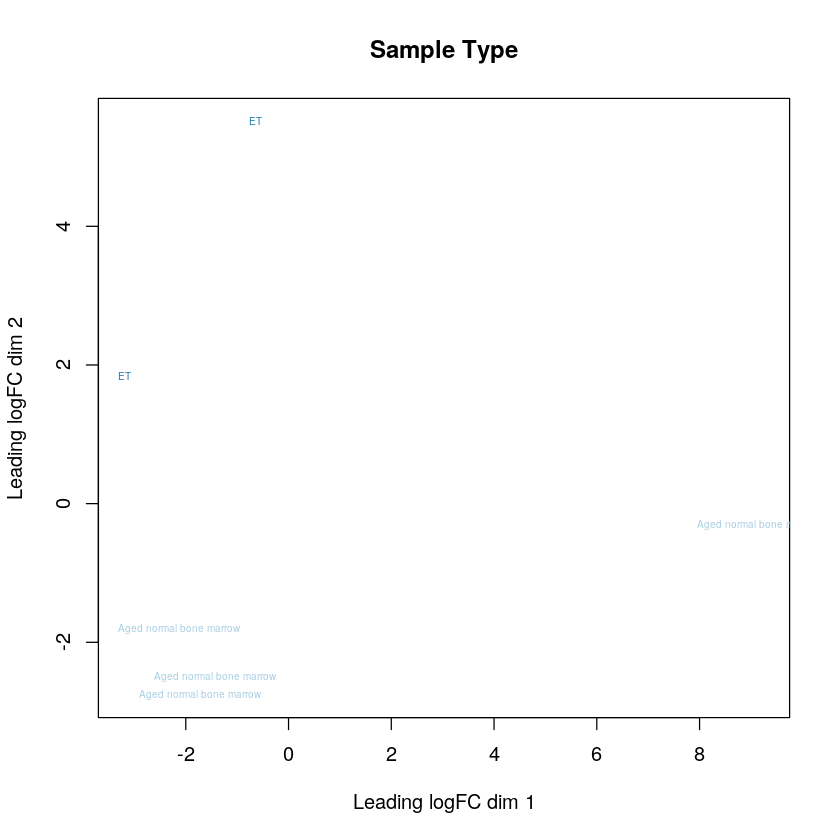

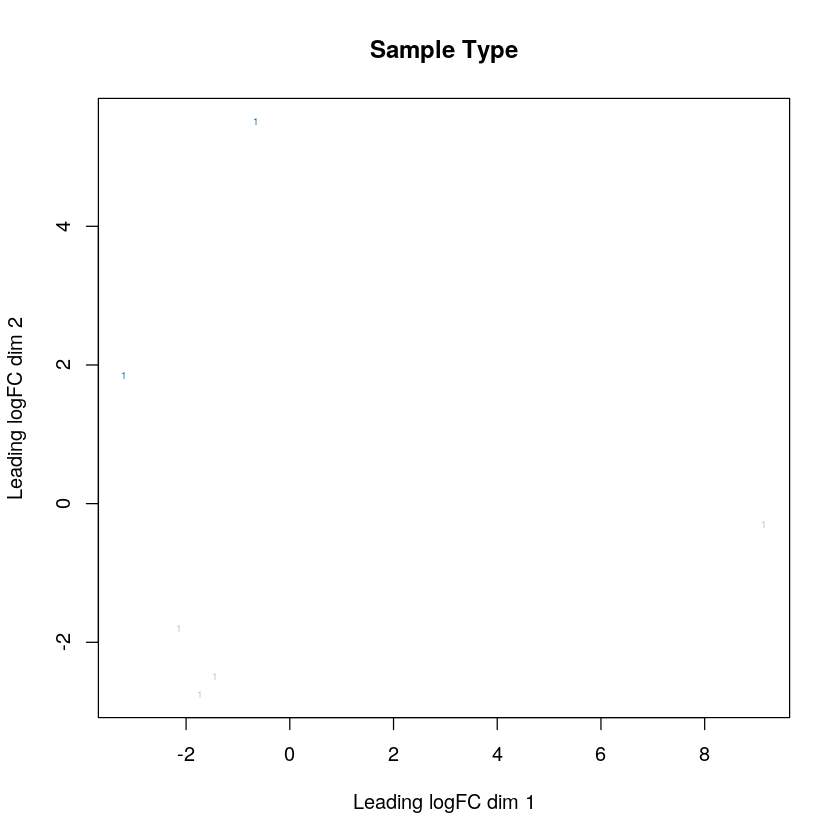

In [16]:
geneCount_coding.ABM.ET.S <- subset(geneCount.ABM.ET.S, row.names(geneCount.ABM.ET.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.ET.S))
rownames(geneCount_coding.ABM.ET.S) <- id_list
x.ABM.ET.S <- DGEList(counts = geneCount_coding.ABM.ET.S, lib.size = colSums(geneCount_coding.ABM.ET.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.ET.S)), samples = metaCrop.ABM.ET.S,
group = metaCrop.ABM.ET.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.ET.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.ET.S <- cpm(x.ABM.ET.S)
lcpm.ABM.ET.S <- cpm(x.ABM.ET.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.ET.S>1)>=5
x.ABM.ET.S <- x.ABM.ET.S[keep.exprs,, keep.lib.sizes=FALSE]

x.ABM.ET.S <- calcNormFactors(x.ABM.ET.S, method = "TMM")
col.samp.ABM.ET.S <- samp.type.ABM.ET.S <- as.factor(x.ABM.ET.S$samples$Sample.type)
levels(col.samp.ABM.ET.S) <-  brewer.pal(nlevels(col.samp.ABM.ET.S), "Paired") #if more than 2 conditions
col.samp.ABM.ET.S <- as.character(col.samp.ABM.ET.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.ET.S, labels=samp.type.ABM.ET.S, col=col.samp.ABM.ET.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.ET.S, labels=x.ABM.ET.S$samples$group, col=col.samp.ABM.ET.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.PV.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

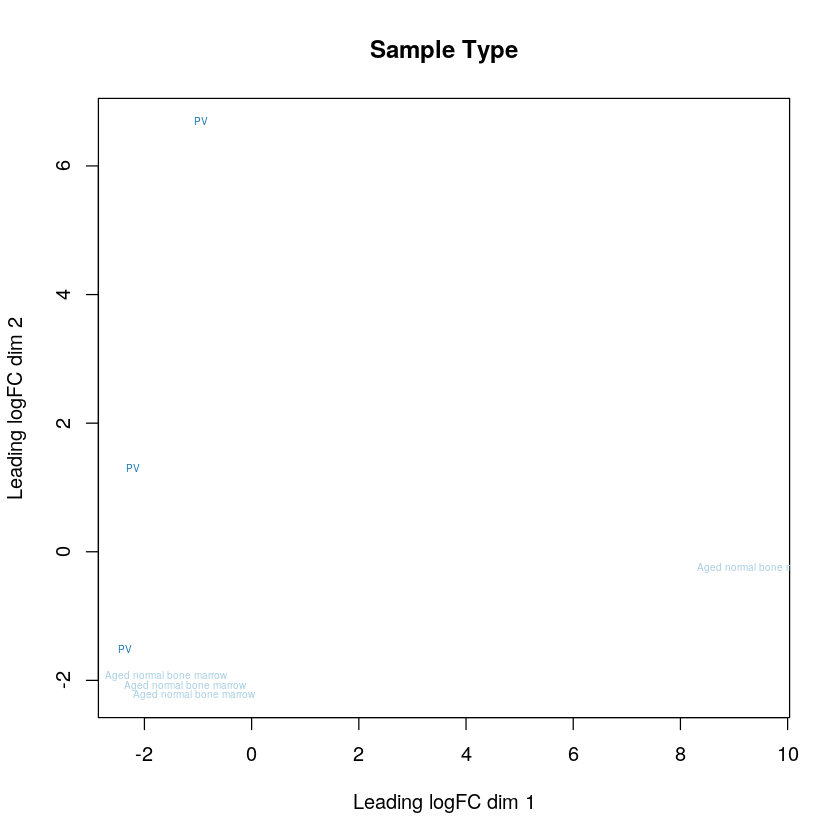

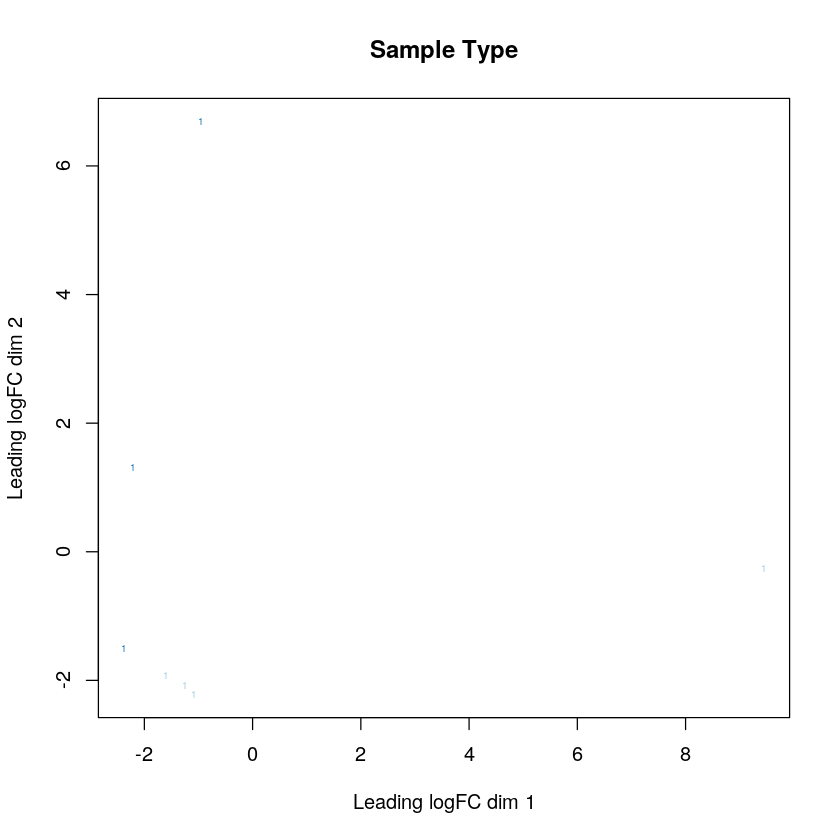

In [17]:
geneCount_coding.ABM.PV.S <- subset(geneCount.ABM.PV.S, row.names(geneCount.ABM.PV.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.PV.S))
rownames(geneCount_coding.ABM.PV.S) <- id_list
x.ABM.PV.S <- DGEList(counts = geneCount_coding.ABM.PV.S, lib.size = colSums(geneCount_coding.ABM.PV.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.PV.S)), samples = metaCrop.ABM.PV.S,
group = metaCrop.ABM.PV.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.PV.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]


cpm.ABM.PV.S <- cpm(x.ABM.PV.S)
lcpm.ABM.PV.S <- cpm(x.ABM.PV.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.PV.S>1)>=6
x.ABM.PV.S <- x.ABM.PV.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.PV.S <- calcNormFactors(x.ABM.PV.S, method = "TMM")

col.samp.ABM.PV.S <- samp.type.ABM.PV.S <- as.factor(x.ABM.PV.S$samples$Sample.type)
levels(col.samp.ABM.PV.S) <-  brewer.pal(nlevels(col.samp.ABM.PV.S), "Paired") #if more than 2 conditions
col.samp.ABM.PV.S <- as.character(col.samp.ABM.PV.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.PV.S, labels=samp.type.ABM.PV.S, col=col.samp.ABM.PV.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.PV.S, labels=x.ABM.PV.S$samples$group, col=col.samp.ABM.PV.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.MF.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

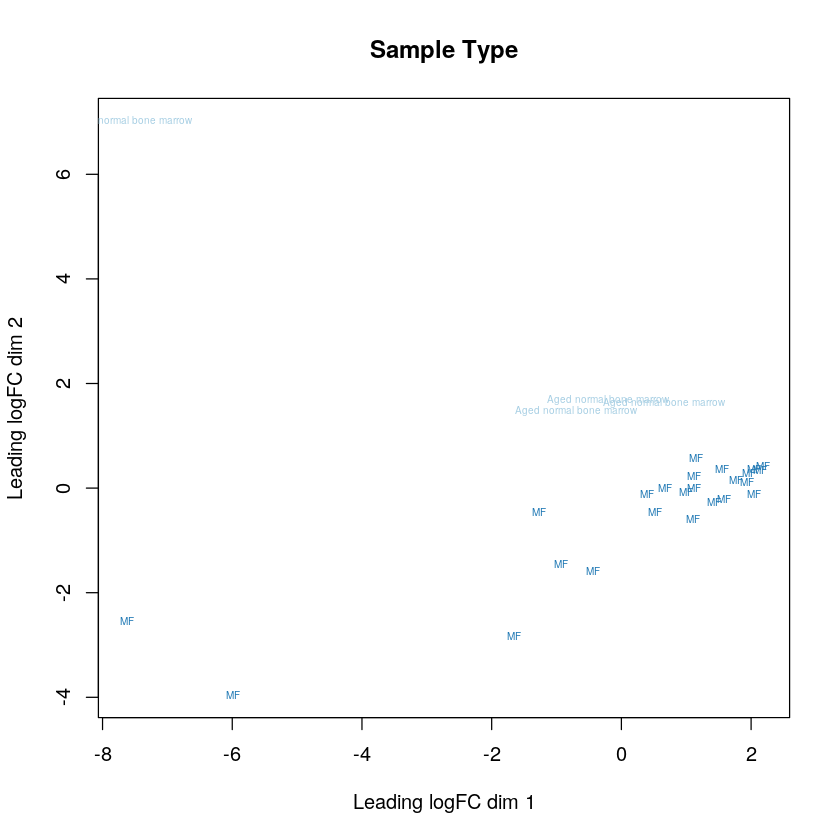

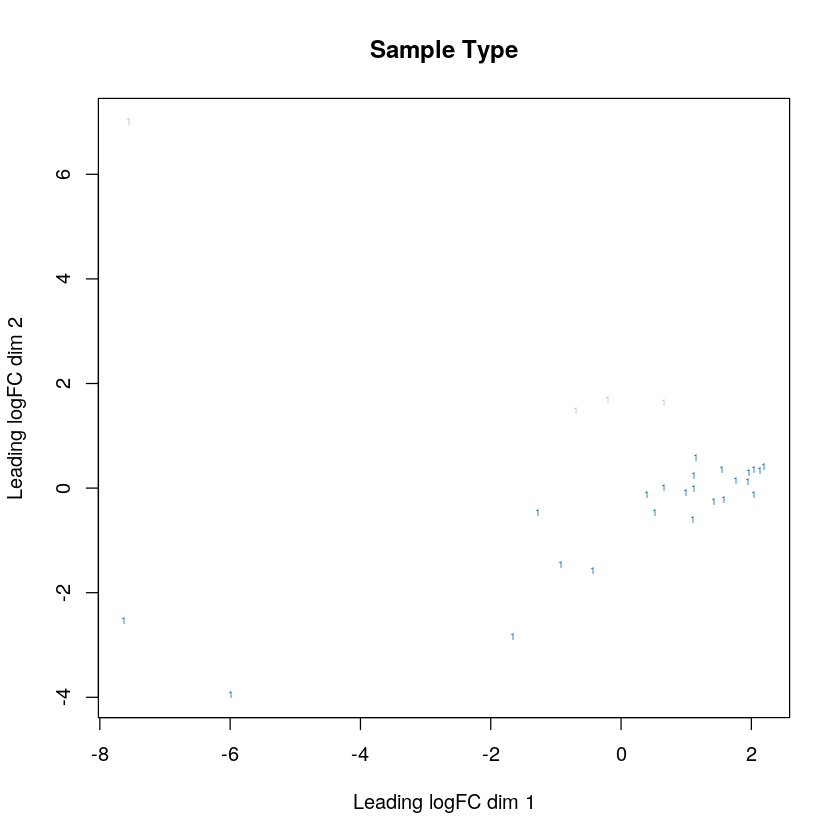

In [18]:
geneCount_coding.ABM.MF.S <- subset(geneCount.ABM.MF.S, row.names(geneCount.ABM.MF.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.MF.S))
rownames(geneCount_coding.ABM.MF.S) <- id_list
x.ABM.MF.S <- DGEList(counts = geneCount_coding.ABM.MF.S, lib.size = colSums(geneCount_coding.ABM.MF.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.MF.S)), samples = metaCrop.ABM.MF.S,
group = metaCrop.ABM.MF.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.MF.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.MF.S <- cpm(x.ABM.MF.S)
lcpm.ABM.MF.S <- cpm(x.ABM.MF.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.MF.S>1)>=27
x.ABM.MF.S <- x.ABM.MF.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.MF.S <- calcNormFactors(x.ABM.MF.S, method = "TMM")

col.samp.ABM.MF.S <- samp.type.ABM.MF.S <- as.factor(x.ABM.MF.S$samples$Sample.type)
levels(col.samp.ABM.MF.S) <-  brewer.pal(nlevels(col.samp.ABM.MF.S), "Paired") #if more than 2 conditions
col.samp.ABM.MF.S <- as.character(col.samp.ABM.MF.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.MF.S, labels=samp.type.ABM.MF.S, col=col.samp.ABM.MF.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.MF.S, labels=x.ABM.MF.S$samples$group, col=col.samp.ABM.MF.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.CML.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

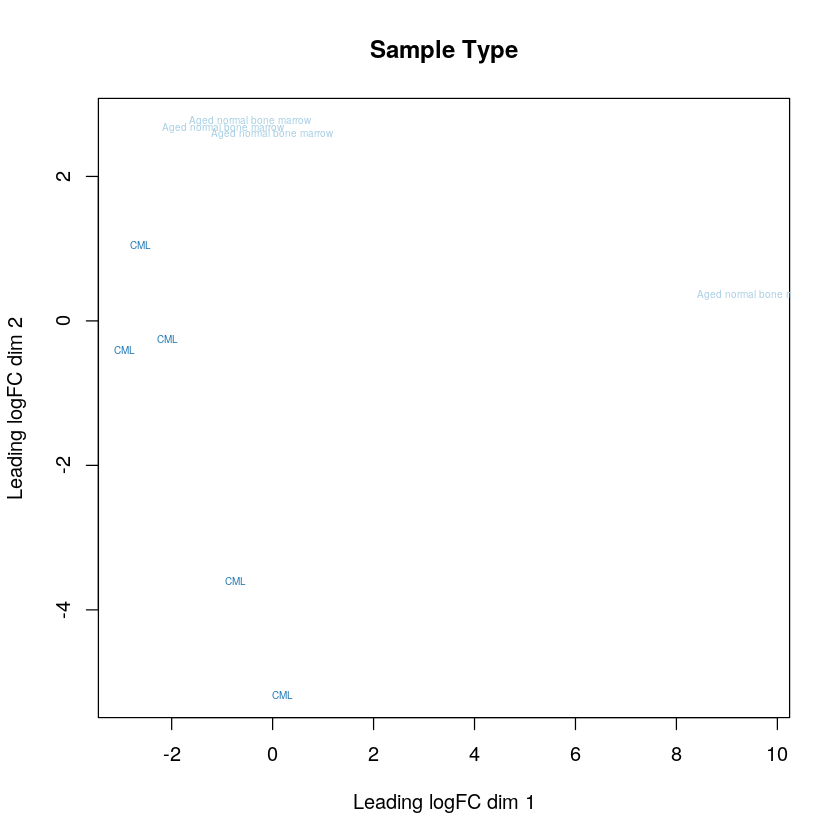

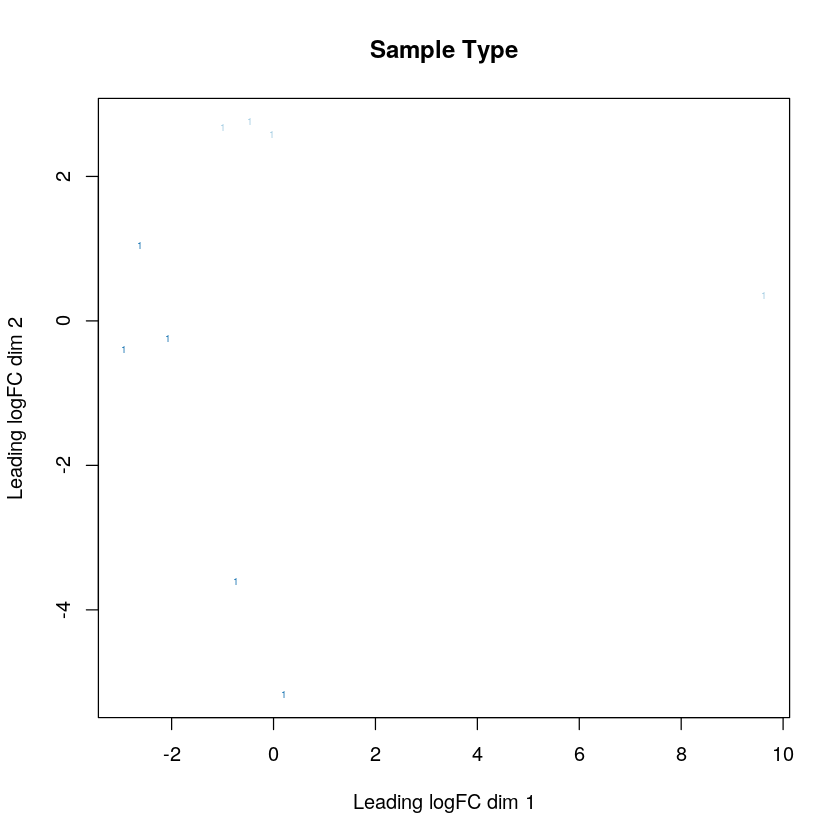

In [19]:
geneCount_coding.ABM.CML.S <- subset(geneCount.ABM.CML.S, row.names(geneCount.ABM.CML.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.CML.S))
rownames(geneCount_coding.ABM.CML.S) <- id_list
x.ABM.CML.S <- DGEList(counts = geneCount_coding.ABM.CML.S, lib.size = colSums(geneCount_coding.ABM.CML.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.CML.S)), samples = metaCrop.ABM.CML.S,
group = metaCrop.ABM.CML.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.CML.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.CML.S <- cpm(x.ABM.CML.S)
lcpm.ABM.CML.S <- cpm(x.ABM.CML.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.CML.S>1)>=8
x.ABM.CML.S <- x.ABM.CML.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.CML.S <- calcNormFactors(x.ABM.CML.S, method = "TMM")

col.samp.ABM.CML.S <- samp.type.ABM.CML.S <- as.factor(x.ABM.CML.S$samples$Sample.type)
levels(col.samp.ABM.CML.S) <-  brewer.pal(nlevels(col.samp.ABM.CML.S), "Paired") #if more than 2 conditions
col.samp.ABM.CML.S <- as.character(col.samp.ABM.CML.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.CML.S, labels=samp.type.ABM.CML.S, col=col.samp.ABM.CML.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.CML.S, labels=x.ABM.CML.S$samples$group, col=col.samp.ABM.CML.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.AML.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

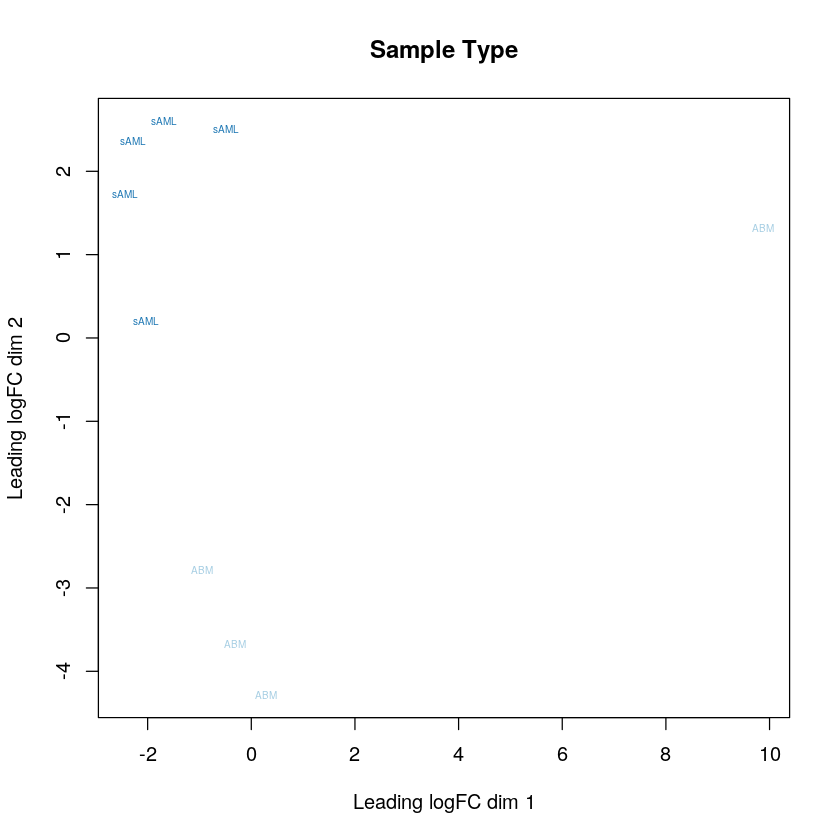

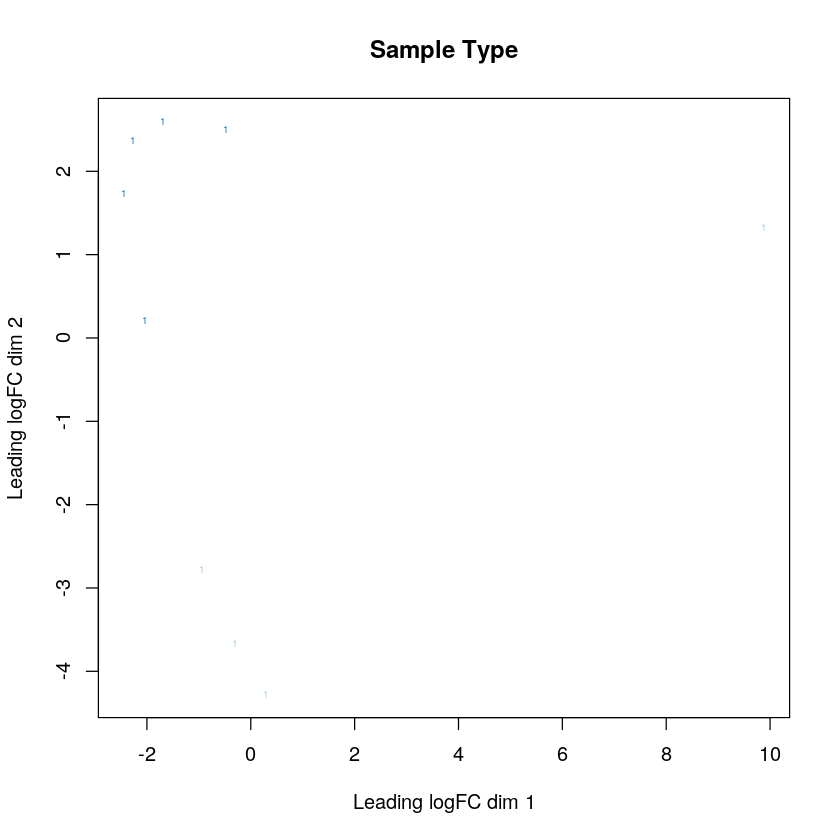

In [20]:
geneCount_coding.ABM.AML.S <- subset(geneCount.ABM.AML.S, row.names(geneCount.ABM.AML.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.AML.S))
rownames(geneCount_coding.ABM.AML.S) <- id_list
x.ABM.AML.S <- DGEList(counts = geneCount_coding.ABM.AML.S, lib.size = colSums(geneCount_coding.ABM.AML.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.AML.S)), samples = metaCrop.ABM.AML.S,
group = metaCrop.ABM.AML.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.AML.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.AML.S <- cpm(x.ABM.AML.S)
lcpm.ABM.AML.S <- cpm(x.ABM.AML.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.AML.S>1)>=8
x.ABM.AML.S <- x.ABM.AML.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.AML.S <- calcNormFactors(x.ABM.AML.S, method = "TMM")

col.samp.ABM.AML.S <- samp.type.ABM.AML.S <- as.factor(x.ABM.AML.S$samples$Sample.type3)
levels(col.samp.ABM.AML.S) <-  brewer.pal(nlevels(col.samp.ABM.AML.S), "Paired") #if more than 2 conditions
col.samp.ABM.AML.S <- as.character(col.samp.ABM.AML.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.AML.S, labels=samp.type.ABM.AML.S, col=col.samp.ABM.AML.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.AML.S, labels=x.ABM.AML.S$samples$group, col=col.samp.ABM.AML.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.AML.MF.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

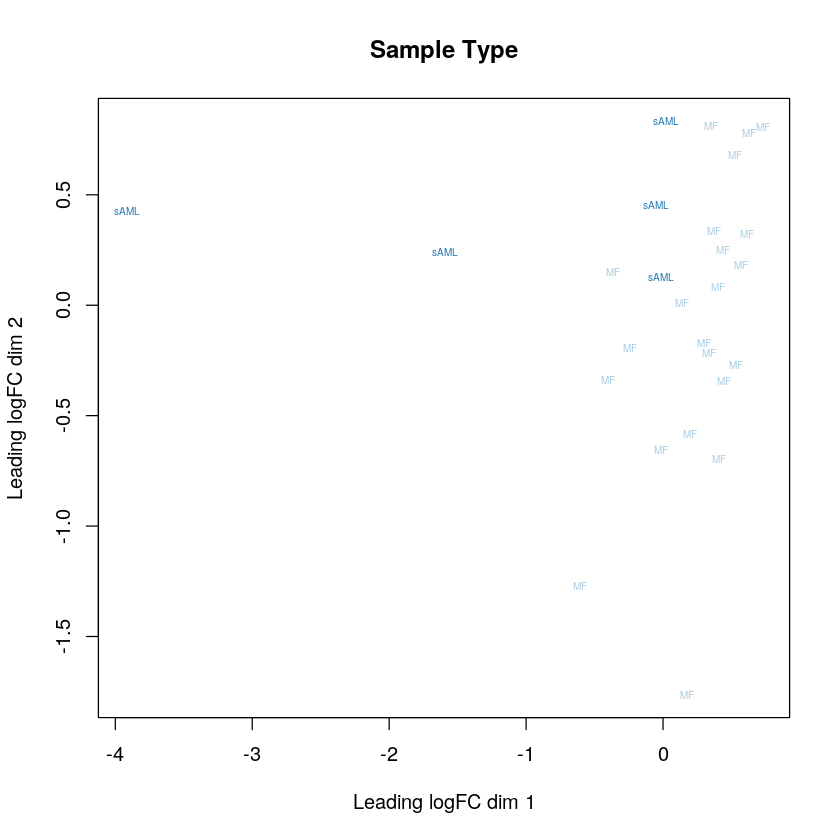

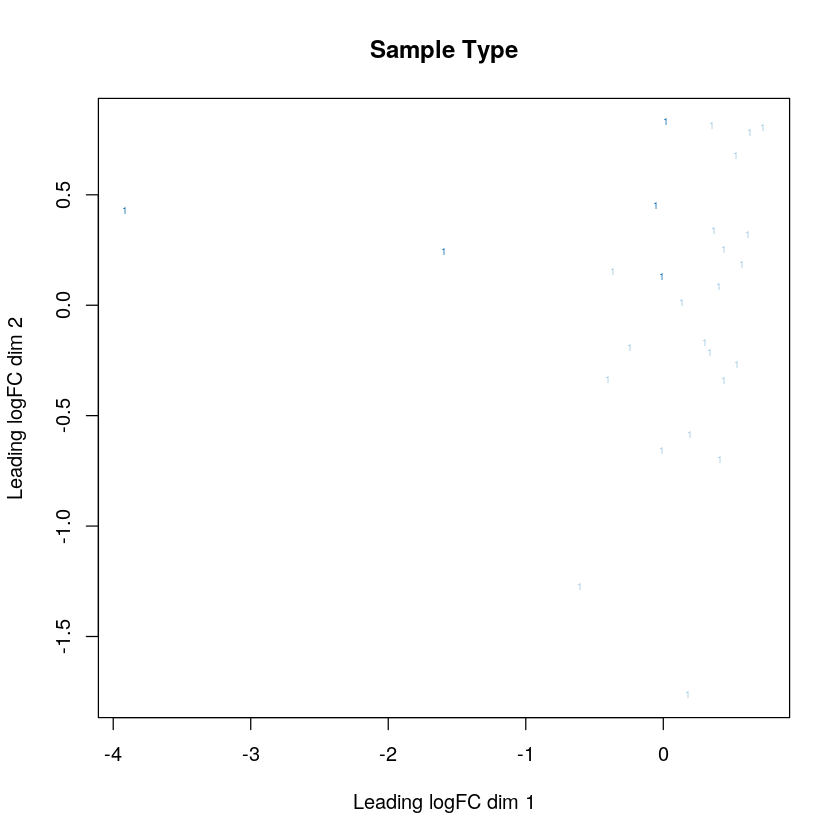

In [22]:
geneCount_coding.AML.MF.S <- subset(geneCount.AML.MF.S, row.names(geneCount.AML.MF.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.AML.MF.S))
rownames(geneCount_coding.AML.MF.S) <- id_list
x.AML.MF.S <- DGEList(counts = geneCount_coding.AML.MF.S, lib.size = colSums(geneCount_coding.AML.MF.S),
norm.factors = rep(1,ncol(geneCount_coding.AML.MF.S)), samples = metaCrop.AML.MF.S,
group = metaCrop.AML.MF.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.AML.MF.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.AML.MF.S <- cpm(x.AML.MF.S)
lcpm.AML.MF.S <- cpm(x.AML.MF.S, log=TRUE)
keep.exprs <- rowSums(cpm.AML.MF.S>1)>=27
x.AML.MF.S <- x.AML.MF.S[keep.exprs,, keep.lib.sizes=FALSE]
lcpm.AML.MF.S <- cpm(x.AML.MF.S, log=TRUE)

x.AML.MF.S <- calcNormFactors(x.AML.MF.S, method = "TMM")

col.samp.AML.MF.S <- samp.type.AML.MF.S <- as.factor(x.AML.MF.S$samples$Sample.type3)
levels(col.samp.AML.MF.S) <-  brewer.pal(nlevels(col.samp.AML.MF.S), "Paired") #if more than 2 conditions
col.samp.AML.MF.S <- as.character(col.samp.AML.MF.S)

par(mfrow=c(1,1))
plotMDS(lcpm.AML.MF.S, labels=samp.type.AML.MF.S, col=col.samp.AML.MF.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.AML.MF.S, labels=x.AML.MF.S$samples$group, col=col.samp.AML.MF.S, cex=.5)
title(main="Sample Type")

### Limma Analysis to identify Differentially Expressed Genes

In [23]:
samples.tmp <- x.all$sample$Sample.type3
table(samples.tmp)
samples.all <- factor(as.character(samples.tmp), 
                      levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))
levels(samples.all)
design.all <- model.matrix(~0 + samples.all)
colnames(design.all) <- c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML")
celltypes.all <- as.factor(as.character(x.all$sample$CellType))
cm.all <- makeContrasts(ABM-YBM, ABM-ET, ABM-PV, ABM-MF,
                        ABM-sAML,ABM-CML, levels=design.all)
v.all <- voom(x.all, design.all, plot=FALSE)
vfit.all <- lmFit(v.all,design.all)
vfit.all <- contrasts.fit(vfit.all, contrasts=cm.all)
efit.all <- eBayes(vfit.all)
topTable(efit.all, coef=4)
dt.all <- decideTests(efit.all)
summary(dt.all)
length(which(dt.all!=0))
topTable.all <- topTreat(efit.all, coef=1, n=Inf, sort.by="p")
topTable.all.ABM.YBM <- topTreat(efit.all, coef=1, n=Inf, sort.by="p")
topTable.all.ABM.ET <- topTreat(efit.all, coef=2, n=Inf, sort.by="p")
topTable.all.ABM.PV <- topTreat(efit.all, coef=3, n=Inf, sort.by="p")
topTable.all.ABM.MF <- topTreat(efit.all, coef=4, n=Inf, sort.by="p")
topTable.all.ABM.AML <- topTreat(efit.all, coef=5, n=Inf, sort.by="p")
topTable.all.ABM.CML <- topTreat(efit.all, coef=6, n=Inf, sort.by="p")


samples.tmp
 ABM  CML   ET   MF   PV sAML  YBM 
   4    5    2   24    3    5    4 

[1] "ABM"   "YBM"   "ET"    "PV"    "MF"    "CML"   "sAML"  "dnAML"

Coefficients not estimable: dnAML 


Warning message:
“Partial NA coefficients for 13262 probe(s)”

Coefficients not estimable: dnAML 


Warning message:
“Partial NA coefficients for 13262 probe(s)”

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000172660,ENSG00000172660,NA,NA,4.372016,5.120710,21.79418,6.341475e-26,8.410064e-22,48.25997
ENSG00000214753,ENSG00000214753,221092,HNRNPUL2,4.647670,4.193576,19.78084,3.629644e-24,2.406817e-20,44.12903
ENSG00000198840,ENSG00000198840,4537,ND3,5.356342,5.567249,18.48822,5.821836e-23,2.160745e-19,41.91228
ENSG00000204304,ENSG00000204304,5089,PBX2,4.147518,3.911658,18.43709,6.517102e-23,2.160745e-19,41.25369
ENSG00000063244,ENSG00000063244,11338,U2AF2,3.619909,4.920607,18.17100,1.176937e-22,3.121709e-19,41.05996
ENSG00000170027,ENSG00000170027,7532,YWHAG,3.224521,5.145790,17.31173,8.309814e-22,1.836746e-18,39.23451
ENSG00000204469,ENSG00000204469,7916,PRRC2A,3.080188,6.390841,16.71238,3.391147e-21,6.424770e-18,38.04307
ENSG00000110090,ENSG00000110090,1374,CPT1A,2.853958,6.117462,16.63852,4.043039e-21,6.702348e-18,37.85170
ENSG00000264364,ENSG00000264364,140735,DYNLL2,4.689856,3.861478,16.07348,1.581556e-20,2.330511e-17,36.16785


       ABM - YBM ABM - ET ABM - PV ABM - MF ABM - sAML ABM - CML
Down           0      389      630     1385        938       993
NotSig     13262    12515    11935    10277      11450     11202
Up             0      358      697     1600        874      1067

[1] 8931

In [24]:
samples.tmp <- x.ABM.ET.S$sample$Sample.type
table(samples.tmp)
samples.ABM.ET.S <- as.factor(samples.tmp)
design.ABM.ET.S <- model.matrix(~0 + samples.ABM.ET.S)
colnames(design.ABM.ET.S) <- c("AgedBoneMarrowCtrl", "ET")
cm.ABM.ET.S <- makeContrasts(ET-AgedBoneMarrowCtrl, levels=design.ABM.ET.S)
v.ABM.ET.S <- voom(x.ABM.ET.S, design.ABM.ET.S, plot=FALSE)
vfit.ABM.ET.S <- lmFit(v.ABM.ET.S,design.ABM.ET.S)
vfit.ABM.ET.S <- contrasts.fit(vfit.ABM.ET.S, contrasts=cm.ABM.ET.S)
efit.ABM.ET.S <- eBayes(vfit.ABM.ET.S)
dt.ABM.ET.S <- decideTests(efit.ABM.ET.S)
summary(dt.ABM.ET.S)
length(which(dt.ABM.ET.S!=0))
topTable.ABM.ET.S <- topTreat(efit.ABM.ET.S, coef=1, n=Inf, sort.by="p")
topTable.ABM.ET.S.anno <- cbind(topTable.ABM.ET.S, 
                                annot=pcgenes[match(rownames(topTable.ABM.ET.S), pcgenes$ENSEMBL), c("ENTREZID","SYMBOL")])
#write.csv(topTable.ABM.ET.S.anno, file="Limma_DEanno_AgedBMvsET_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      ET 
                      4                       2 

       ET - AgedBoneMarrowCtrl
Down                        22
NotSig                   11023
Up                           5

[1] 27

In [25]:
samples.tmp <- x.ABM.PV.S$sample$Sample.type
table(samples.tmp)
samples.ABM.PV.S <- as.factor(samples.tmp)
design.ABM.PV.S <- model.matrix(~0 + samples.ABM.PV.S)
colnames(design.ABM.PV.S) <- c("AgedBoneMarrowCtrl", "PV.ET")
cm.ABM.PV.S <- makeContrasts(PV.ET-AgedBoneMarrowCtrl, levels=design.ABM.PV.S)
v.ABM.PV.S <- voom(x.ABM.PV.S, design.ABM.PV.S, plot=FALSE)
vfit.ABM.PV.S <- lmFit(v.ABM.PV.S,design.ABM.PV.S)
vfit.ABM.PV.S <- contrasts.fit(vfit.ABM.PV.S, contrasts=cm.ABM.PV.S)
efit.ABM.PV.S <- eBayes(vfit.ABM.PV.S)
dt.ABM.PV.S <- decideTests(efit.ABM.PV.S)
summary(dt.ABM.PV.S)
length(which(dt.ABM.PV.S!=0))
topTable.ABM.PV.S <- topTreat(efit.ABM.PV.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.PV.S, file="RNAseq_DEgenelists/Limma_DE_AgedBMvsPV_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      PV 
                      4                       3 

       PV.ET - AgedBoneMarrowCtrl
Down                          477
NotSig                      10049
Up                            287

[1] 764

In [26]:
samples.tmp <- x.ABM.MF.S$sample$Sample.type
table(samples.tmp)
samples.ABM.MF.S <- as.factor(samples.tmp)
design.ABM.MF.S <- model.matrix(~0 + samples.ABM.MF.S)
colnames(design.ABM.MF.S) <- c("AgedBoneMarrowCtrl", "MF")
cm.ABM.MF.S <- makeContrasts(MF-AgedBoneMarrowCtrl, levels=design.ABM.MF.S)
v.ABM.MF.S <- voom(x.ABM.MF.S, design.ABM.MF.S, plot=FALSE)
vfit.ABM.MF.S <- lmFit(v.ABM.MF.S,design.ABM.MF.S)
vfit.ABM.MF.S <- contrasts.fit(vfit.ABM.MF.S, contrasts=cm.ABM.MF.S)
efit.ABM.MF.S <- eBayes(vfit.ABM.MF.S)
dt.ABM.MF.S <- decideTests(efit.ABM.MF.S)
summary(dt.ABM.MF.S)
length(which(dt.ABM.MF.S!=0))
topTable.ABM.MF.S <- topTreat(efit.ABM.MF.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.MF.S, file="LImma_DE_AgedBMvsMF_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      MF 
                      4                      24 

       MF - AgedBoneMarrowCtrl
Down                      1550
NotSig                    5528
Up                        1531

[1] 3081

In [27]:
samples.tmp <- x.ABM.CML.S$sample$Sample.type
table(samples.tmp)
samples.ABM.CML.S <- as.factor(samples.tmp)
design.ABM.CML.S <- model.matrix(~0 + samples.ABM.CML.S)
colnames(design.ABM.CML.S) <- c("AgedBoneMarrowCtrl", "CML")
cm.ABM.CML.S <- makeContrasts(CML-AgedBoneMarrowCtrl, levels=design.ABM.CML.S)
v.ABM.CML.S <- voom(x.ABM.CML.S, design.ABM.CML.S, plot=FALSE)
vfit.ABM.CML.S <- lmFit(v.ABM.CML.S,design.ABM.CML.S)
vfit.ABM.CML.S <- contrasts.fit(vfit.ABM.CML.S, contrasts=cm.ABM.CML.S)
efit.ABM.CML.S <- eBayes(vfit.ABM.CML.S)
dt.ABM.CML.S <- decideTests(efit.ABM.CML.S)
summary(dt.ABM.CML.S)
length(which(dt.ABM.CML.S!=0))
topTable.ABM.CML.S <- topTreat(efit.ABM.CML.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.CML.S, file="RNAseq_DEgenelists/Limma_DE_AgedBMvsCML_Stem_Holm_Jamieson_RNASeq_TCW.csv")


samples.tmp
Aged normal bone marrow                     CML 
                      4                       5 

       CML - AgedBoneMarrowCtrl
Down                        456
NotSig                     9600
Up                          367

[1] 823

In [28]:
samples.tmp <- x.ABM.AML.S$sample$Sample.type
table(samples.tmp)
samples.ABM.AML.S <- as.factor(samples.tmp)
design.ABM.AML.S <- model.matrix(~0 + samples.ABM.AML.S)
colnames(design.ABM.AML.S) <- c("AgedBoneMarrowCtrl", "AML")
cm.ABM.AML.S <- makeContrasts(AML-AgedBoneMarrowCtrl, levels=design.ABM.AML.S)
v.ABM.AML.S <- voom(x.ABM.AML.S, design.ABM.AML.S, plot=FALSE)
vfit.ABM.AML.S <- lmFit(v.ABM.AML.S,design.ABM.AML.S)
vfit.ABM.AML.S <- contrasts.fit(vfit.ABM.AML.S, contrasts=cm.ABM.AML.S)
efit.ABM.AML.S <- eBayes(vfit.ABM.AML.S)
dt.ABM.AML.S <- decideTests(efit.ABM.AML.S)
summary(dt.ABM.AML.S)
length(which(dt.ABM.AML.S!=0))
topTable.ABM.AML.S <- topTreat(efit.ABM.AML.S, coef=1, n=Inf, sort.by="p")
write.csv(topTable.ABM.AML.S, file="RNAseq_DEgenelists/Limma_DE_AgedBMvsAML_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                     AML 
                      4                       5 

       AML - AgedBoneMarrowCtrl
Down                        417
NotSig                     9799
Up                          155

[1] 572

## Supplemental Figure S2B
### Heatmap of AML vs MF DE Genes in Hematopoietic Stem Cells

samples.tmp
  MF sAML 
  22    5 

       CellType1 CellType2 sAML - MF
Down           0         0       513
NotSig         2         0      7995
Up          9078      9080       572

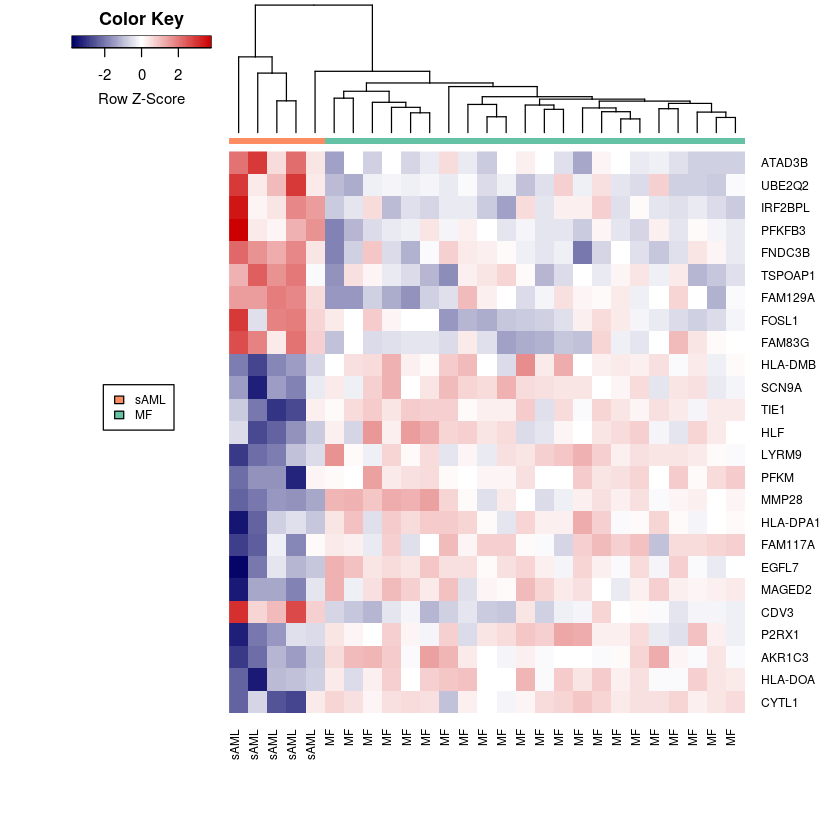

In [29]:
samples.tmp <- x.AML.MF.S$sample$Sample.type3
table(samples.tmp)
samples.AML.MF.S <- as.factor(samples.tmp)

celltypes.AML.MF.S <- as.factor(as.character(x.AML.MF.S$sample$CellType))
design.AML.MF.S <- model.matrix(~0 + celltypes.AML.MF.S + samples.AML.MF.S)
colnames(design.AML.MF.S) <- c("CellType1","CellType2", "sAML - MF")

v.AML.MF.S <- voom(x.AML.MF.S, design.AML.MF.S, plot=FALSE)
vfit.AML.MF.S <- lmFit(v.AML.MF.S,design.AML.MF.S)
efit.AML.MF.S <- eBayes(vfit.AML.MF.S)
dt.AML.MF.S <- decideTests(efit.AML.MF.S)
summary(dt.AML.MF.S)
topTable.AML.MF.S <- topTreat(efit.AML.MF.S, coef=3, n=Inf, sort.by="p")
x.AML.MF.S$genes[x.AML.MF.S$genes$genes %in% "ENSG00000129270", 2:3]  <- c("79148", "MMP28")
topgenes.AML.MF.S <- row.names(topTable.AML.MF.S)[1:25]
k.AML.MF.S <- which(row.names(x.AML.MF.S$counts) %in% topgenes.AML.MF.S)
logCPM.AML.MF.S <- cpm(x.AML.MF.S, log=TRUE)
group.AML.MF.S <- as.factor(x.AML.MF.S$samples$Sample.type3)
col.samp.AML.MF.S <- samp.type.AML.MF.S <- as.factor(x.AML.MF.S$samples$Sample.type3)
levels(col.samp.AML.MF.S) <-  brewer.pal(8, "Set2") 
col.samp.AML.MF.S <- as.character(col.samp.AML.MF.S)
mycol <- colorpanel(100,"#000066","white","#CC0000")

#pdf(file="Holm_Jamieson_AML_TxvMF_Stem_LimmaFactorCellType_DEGenes_Heatmap_03102020.pdf", width=7, height=9)
heatmap.2(logCPM.AML.MF.S[k.AML.MF.S,], scale="row",
labRow=x.AML.MF.S$genes$SYMBOL[k.AML.MF.S], labCol=x.AML.MF.S$samples$Sample.type3,  
col=mycol, trace="none", density.info="none", ColSideColors=col.samp.AML.MF.S, key=T,
margin=c(8,6), lhei=c(2,10), dendrogram="column")
#
legend("left", fill = unique(col.samp.AML.MF.S),
legend = unique(group.AML.MF.S), inset=c(0,0), cex=.6)#
#dev.off()

## Supplemental Figure S3A
### Venn Diagram of Differentially Expressed Genes Across Comparisons in Hematopoietic Stem Cells

In [52]:
vennInput_withAML <- matrix(nrow = nrow(geneCount_coding.ABM.MF.S), ncol=4, data = 0)
dim(vennInput_withAML)
rownames(vennInput_withAML) <- rownames(geneCount_coding.ABM.MF.S)

vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.S)),1] <- dt.ABM.PV.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.S))], 
                                            rownames(dt.ABM.PV.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.S)),2] <- dt.ABM.ET.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.S))],
                                            rownames(dt.ABM.ET.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.S)),3] <- dt.ABM.MF.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.S))], 
                                            rownames(dt.ABM.MF.S)),1]
#vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.CML.S)),4] <- dt.ABM.CML.S[match(
#                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.CML.S))], 
#                                            rownames(dt.ABM.CML.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.AML.S)),4] <- dt.ABM.AML.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.AML.S))], 
                                            rownames(dt.ABM.AML.S)),1]

colnames(vennInput_withAML) <- c("PV - Bone Marrow Control",
                          "ET - Bone Marrow Control",
                          "MF - Bone Marrow Control", 
                          #"CML - Bone Marrow Control",
                          "sAML - Bone Marrow Control")

pdf("vennDiagram_AgedBMvsPV_ET_MF_CML_AML_Stem_Holm_Jamieson_TCW_03102020.pdf", width=7, height=7)
vennDiagram(vennInput_withAML,circle.col=c('red','blue','green', 'dark orange'), cex=0.75, 
            show.include = FALSE, main="Stem Cell RNASeq - Differentially Expressed Genes ")
dev.off()

[1] 20345     4

png 
  2